In [1]:
# Clean the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv(r'C:/Users/Adityas Regita P/Netacad Ch.3/Data/rpi_data_compact.csv')
data

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25
3,3,19.332,91.81,14.22,2016-11-24,13:37:57
4,4,22.494,92.05,14.08,2016-11-24,13:38:27
...,...,...,...,...,...,...
675,675,retrieve,2016-11-24 19:18:03,NaN,NaN,NaN
676,676,retrieve,2016-11-24 19:18:06,NaN,NaN,NaN
677,677,retrieve,2016-11-24 19:18:10,NaN,NaN,NaN
678,678,retrieve,2016-11-24 19:18:13,NaN,NaN,NaN


In [4]:
df = data.loc[:, ~data.columns.str.contains('^Unnamed')]
df

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27
...,...,...,...,...,...
675,retrieve,2016-11-24 19:18:03,NaN,NaN,NaN
676,retrieve,2016-11-24 19:18:06,NaN,NaN,NaN
677,retrieve,2016-11-24 19:18:10,NaN,NaN,NaN
678,retrieve,2016-11-24 19:18:13,NaN,NaN,NaN


In [5]:
NaNs_in_df = df.isnull()
print(type(NaNs_in_df))
NaNs_in_df

<class 'pandas.core.frame.DataFrame'>


,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
675,False,False,True,True,True
676,False,False,True,True,True
677,False,False,True,True,True
678,False,False,True,True,True


In [6]:
NaNs_per_column = NaNs_in_df.sum()
print(type(NaNs_per_column))
NaNs_per_column

<class 'pandas.core.series.Series'>


Ping (ms)            1
Download (Mbit/s)    1
Upload (Mbit/s)      7
Date                 7
Time                 7
dtype: int64

In [7]:
NaNs_total = NaNs_per_column.sum()
NaNs_total

23

In [8]:
NaNs_pct = np.round(df.isnull().sum().sum()/float(len(df)*len(df.columns))*100, decimals = 4)
print('The DataFrame contains : {} NaNs, equal to {} of the measurements'.format(NaNs_total, NaNs_pct)) #EDL : moved parenthesis

The DataFrame contains : 23 NaNs, equal to 0.6765 of the measurements


In [9]:
df_clean = df.dropna()
df_clean

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27
...,...,...,...,...,...
668,20.952,88.67,14.35,2016-11-24,19:15:32
669,19.397,84.86,14.35,2016-11-24,19:16:04
670,20.117,84.99,14.33,2016-11-24,19:16:34
671,17.995,86.21,6.88,2016-11-24,19:17:04


In [10]:
df_clean.dtypes

Ping (ms)             object
Download (Mbit/s)     object
Upload (Mbit/s)      float64
Date                  object
Time                  object
dtype: object

In [11]:
pd.options.mode.chained_assignment = None

df_clean['Ping (ms)_float'] = df_clean['Ping (ms)'].apply(lambda val: float(val))
df_clean['Download (Mbit/s)_float'] = df_clean['Download (Mbit/s)'].apply(lambda val: float(val))
df_clean.dtypes

Ping (ms)                   object
Download (Mbit/s)           object
Upload (Mbit/s)            float64
Date                        object
Time                        object
Ping (ms)_float            float64
Download (Mbit/s)_float    float64
dtype: object

In [12]:
df_clean

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time,Ping (ms)_float,Download (Mbit/s)_float
0,26.992,91.80,14.31,2016-11-24,13:36:25,26.992,91.80
1,24.532,88.19,14.12,2016-11-24,13:36:55,24.532,88.19
2,20.225,59.86,14.11,2016-11-24,13:37:25,20.225,59.86
3,19.332,91.81,14.22,2016-11-24,13:37:57,19.332,91.81
4,22.494,92.05,14.08,2016-11-24,13:38:27,22.494,92.05
...,...,...,...,...,...,...,...
668,20.952,88.67,14.35,2016-11-24,19:15:32,20.952,88.67
669,19.397,84.86,14.35,2016-11-24,19:16:04,19.397,84.86
670,20.117,84.99,14.33,2016-11-24,19:16:34,20.117,84.99
671,17.995,86.21,6.88,2016-11-24,19:17:04,17.995,86.21


In [13]:
fix_df = df_clean.drop(['Ping (ms)', 'Download (Mbit/s)'], axis = 1)

print(fix_df.dtypes)
print(fix_df)

Upload (Mbit/s)            float64
Date                        object
Time                        object
Ping (ms)_float            float64
Download (Mbit/s)_float    float64
dtype: object
     Upload (Mbit/s)        Date      Time  Ping (ms)_float  \
0              14.31  2016-11-24  13:36:25           26.992   
1              14.12  2016-11-24  13:36:55           24.532   
2              14.11  2016-11-24  13:37:25           20.225   
3              14.22  2016-11-24  13:37:57           19.332   
4              14.08  2016-11-24  13:38:27           22.494   
..               ...         ...       ...              ...   
668            14.35  2016-11-24  19:15:32           20.952   
669            14.35  2016-11-24  19:16:04           19.397   
670            14.33  2016-11-24  19:16:34           20.117   
671             6.88  2016-11-24  19:17:04           17.995   
679            14.23  2016-11-24  19:18:16           22.175   

     Download (Mbit/s)_float  
0                      

In [14]:
fix_df = fix_df.rename(columns = {'Ping (ms)_float':'Ping (ms)',
                                  'Download (Mbit/s)_float':'Download (Mbit/s)'})
fix_df

,Upload (Mbit/s),Date,Time,Ping (ms),Download (Mbit/s)
0,14.31,2016-11-24,13:36:25,26.992,91.80
1,14.12,2016-11-24,13:36:55,24.532,88.19
2,14.11,2016-11-24,13:37:25,20.225,59.86
3,14.22,2016-11-24,13:37:57,19.332,91.81
4,14.08,2016-11-24,13:38:27,22.494,92.05
...,...,...,...,...,...
668,14.35,2016-11-24,19:15:32,20.952,88.67
669,14.35,2016-11-24,19:16:04,19.397,84.86
670,14.33,2016-11-24,19:16:34,20.117,84.99
671,6.88,2016-11-24,19:17:04,17.995,86.21


In [15]:
fix_df = fix_df.reindex(columns = ['Date', 'Time', 'Ping (ms)',
                                   'Download (Mbit/s)', 'Upload (Mbit/s)'])
fix_df.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,13:36:25,26.992,91.80,14.31
1,2016-11-24,13:36:55,24.532,88.19,14.12
2,2016-11-24,13:37:25,20.225,59.86,14.11
3,2016-11-24,13:37:57,19.332,91.81,14.22
4,2016-11-24,13:38:27,22.494,92.05,14.08


In [16]:
fix_df.to_csv(r'C:/Users/Adityas Regita P/Netacad Ch.3/Data/rpi_data_clean.csv', index = False)

In [17]:
# Statistic Analysis

In [18]:
means = fix_df.mean()
means

C:\Users\Adityas Regita P\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Ping (ms)            21.115452
Download (Mbit/s)    90.449212
Upload (Mbit/s)      13.697608
dtype: float64

In [19]:
stds = fix_df.std()
stds

C:\Users\Adityas Regita P\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Ping (ms)            5.161225
Download (Mbit/s)    3.465647
Upload (Mbit/s)      1.080471
dtype: float64

In [20]:
stats_ping = (means['Ping (ms)'], stds['Ping (ms)'])
stats_download = (means['Download (Mbit/s)'], stds['Download (Mbit/s)'])
stats_upload = (means['Upload (Mbit/s)'], stds['Upload (Mbit/s)'])

print('Average ping time: {} ± {} ms'.format(stats_ping[0],stats_ping[1]))
print('Average download speed: {} ± {} Mbit/s'.format(*stats_download))
print('Average upload speed: {} ± {} Mbit/s'.format(*stats_upload))

Average ping time: 21.115451708766724 ± 5.161225495663228 ms
Average download speed: 90.44921248142644 ± 3.4656470318152284 Mbit/s
Average upload speed: 13.697607726597328 ± 1.0804708853031768 Mbit/s


In [21]:
mins = fix_df.min()
mins

Date                 2016-11-24
Time                   13:36:25
Ping (ms)                16.167
Download (Mbit/s)         58.48
Upload (Mbit/s)            6.21
dtype: object

In [22]:
maxs = fix_df.max()
maxs

Date                 2016-11-24
Time                   19:18:16
Ping (ms)                76.528
Download (Mbit/s)         92.87
Upload (Mbit/s)           14.55
dtype: object

In [23]:
mima_ping = (mins['Ping (ms)'], maxs['Ping (ms)'])
mima_download = (mins['Download (Mbit/s)'], maxs['Download (Mbit/s)'])
mima_upload = (mins['Upload (Mbit/s)'], maxs['Upload (Mbit/s)'])

print('Min ping time: {} ms. Max ping time: {} ms'.format(*mima_ping))
print('Min download speed: {} Mbit/s. Max download speed: {} Mbit/s'.format(*mima_download))
print('Min upload speed: {} Mbit/s. Max upload speed: {} Mbit/s'.format(*mima_upload))

Min ping time: 16.167 ms. Max ping time: 76.528 ms
Min download speed: 58.48 Mbit/s. Max download speed: 92.87 Mbit/s
Min upload speed: 6.21 Mbit/s. Max upload speed: 14.55 Mbit/s


In [24]:
fix_df.describe()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
count,673.000000,673.000000,673.000000
mean,21.115452,90.449212,13.697608
std,5.161225,3.465647,1.080471
min,16.167000,58.480000,6.210000
25%,19.115000,90.220000,13.640000
50%,20.322000,91.560000,13.980000
75%,21.843000,92.070000,14.180000
max,76.528000,92.870000,14.550000


In [25]:
# Find the min and max ping time
argmin_ping = fix_df['Ping (ms)'].argmin()
argmax_ping = fix_df['Ping (ms)'].argmax()

# Find the min and max download speed
argmin_download = fix_df['Download (Mbit/s)'].argmin()
argmax_download = fix_df['Download (Mbit/s)'].argmax()

# Find the min and max upload speed
argmin_upload = fix_df['Upload (Mbit/s)'].argmin()
argmax_upload = fix_df['Upload (Mbit/s)'].argmax()

In [26]:
print('Ping measure reached minimum on {} at {}.'.format(fix_df.loc[argmin_ping].Date,
                                                        fix_df.loc[argmin_ping].Time))
print('Download measure reached minimum on {} at {}.'.format(fix_df.loc[argmin_download].Date,
                                                             fix_df.loc[argmin_download].Time))
print('Upload measure reached minimum on {} at {}.'.format(fix_df.loc[argmin_upload].Date,
                                                           fix_df.loc[argmin_upload].Time))
print('Ping measure reached maximum on {} at {}.'.format(fix_df.loc[argmax_ping].Date,
                                                        fix_df.loc[argmax_ping].Time))
print('Download measure reached maximum on {} at {}.'.format(fix_df.loc[argmax_download].Date,
                                                             fix_df.loc[argmax_download].Time))
print('Upload measure reached maximum on {} at {}.'.format(fix_df.loc[argmax_upload].Date,
                                                           fix_df.loc[argmax_upload].Time))

Ping measure reached minimum on 2016-11-24 at 15:26:20.
Download measure reached minimum on 2016-11-24 at 14:57:55.
Upload measure reached minimum on 2016-11-24 at 17:31:47.
Ping measure reached maximum on 2016-11-24 at 17:30:06.
Download measure reached maximum on 2016-11-24 at 17:02:49.
Upload measure reached maximum on 2016-11-24 at 18:02:15.


In [27]:
df_corr = fix_df.corr()
df_corr

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
Ping (ms),1.000000,-0.045626,-0.463099
Download (Mbit/s),-0.045626,1.000000,0.083690
Upload (Mbit/s),-0.463099,0.083690,1.000000


In [28]:
corr = df_corr.values
print('Correlation coefficient between ping and download: {}.'.format(corr[0, 1]))
print('Correlation coefficient between ping and upload: {}.'.format(corr[0, 2]))
print('Correlation coefficient between upload and download: {}.'.format(corr[2, 1]))

Correlation coefficient between ping and download: -0.04562611025837897.
Correlation coefficient between ping and upload: -0.4630987138300179.
Correlation coefficient between upload and download: 0.0836899693372496.


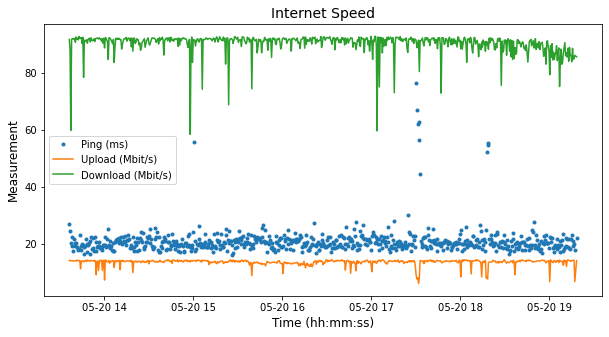

In [45]:
fig, ax = plt.subplots(figsize = (10, 5))

t = pd.to_datetime(fix_df['Time'])

ax.plot(t, fix_df['Ping (ms)'], '.', label = 'Ping (ms)')
ax.plot(t, fix_df['Upload (Mbit/s)'], label = 'Upload (Mbit/s)')
ax.plot(t, fix_df['Download (Mbit/s)'], label = 'Download (Mbit/s)')

ax.set_title('Internet Speed', size = 14)
ax.set_ylabel('Measurement', size = 12)
ax.set_xlabel('Time (hh:mm:ss)', size = 12)

ax.legend()
plt.show()